## Descripción del proyecto
Trabajas en la compañía de extracción de petróleo OilyGiant. Tu tarea es encontrar los mejores lugares donde abrir 200 pozos nuevos de petróleo.

Para completar esta tarea, tendrás que realizar los siguientes pasos:

Leer los archivos con los parámetros recogidos de pozos petrolíferos en la región seleccionada: calidad de crudo y volumen de reservas.
Crear un modelo para predecir el volumen de reservas en pozos nuevos.
Elegir los pozos petrolíferos que tienen los valores estimados más altos.
Elegir la región con el beneficio total más alto para los pozos petrolíferos seleccionados.
Tienes datos sobre muestras de crudo de tres regiones. Ya se conocen los parámetros de cada pozo petrolero de la región. Crea un modelo que ayude a elegir la región con el mayor margen de beneficio. Analiza los beneficios y riesgos potenciales utilizando la técnica bootstrapping.

## Condiciones:
Solo se debe usar la regresión lineal para el entrenamiento del modelo.
Al explorar la región, se lleva a cabo un estudio de 500 puntos con la selección de los mejores 200 puntos para el cálculo del beneficio.
El presupuesto para el desarrollo de 200 pozos petroleros es de 100 millones de dólares.
Un barril de materias primas genera 4.5 USD de ingresos. El ingreso de una unidad de producto es de 4500 dólares (el volumen de reservas está expresado en miles de barriles).
Después de la evaluación de riesgo, mantén solo las regiones con riesgo de pérdidas inferior al 2.5%. De las que se ajustan a los criterios, se debe seleccionar la región con el beneficio promedio más alto.
Los datos son sintéticos: los detalles del contrato y las características del pozo no se publican.

## Descripción de datos
Los datos de exploración geológica de las tres regiones se almacenan en archivos:

/datasets/geo_data_0.csv. Descarga el conjunto de datos
/datasets/geo_data_1.csv. Descarga el conjunto de datos
/datasets/geo_data_2.csv. Descarga el conjunto de datos

    id — identificador único de pozo de petróleo
    f0, f1, f2 — tres características de los puntos (su significado específico no es importante, pero las características en sí son significativas)
    product — volumen de reservas en el pozo de petróleo (miles de barriles).

In [1]:
# Importamos las librerias a utilizar
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from numpy.random import RandomState

In [2]:
# Extraemos los DF a utilizar.
region_0 = pd.read_csv('../source/geo_data_0.csv')
region_1 = pd.read_csv('../source/geo_data_1.csv')
region_2 = pd.read_csv('../source/geo_data_2.csv')

In [3]:
#Analizamos mi df region_0
region_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [4]:
#Analizamos si existen valores duplicados en el Df general y en el Id.
print('Df region_0')
print(region_0.duplicated().sum())
print('Df regiom_0 a nivel de ID')
print(region_0['id'].duplicated().sum())

Df region_0
0
Df regiom_0 a nivel de ID
10


In [5]:
# Procedo a eliminar los 10 ID duplicados.
region_0 = region_0.drop_duplicates(subset='id')
# Volvemos a revisar los duplicados para veriicar que se hayan eliminado.
print(region_0['id'].duplicated().sum())

0


array([[<Axes: title={'center': 'f0'}>, <Axes: title={'center': 'f1'}>],
       [<Axes: title={'center': 'f2'}>,
        <Axes: title={'center': 'product'}>]], dtype=object)

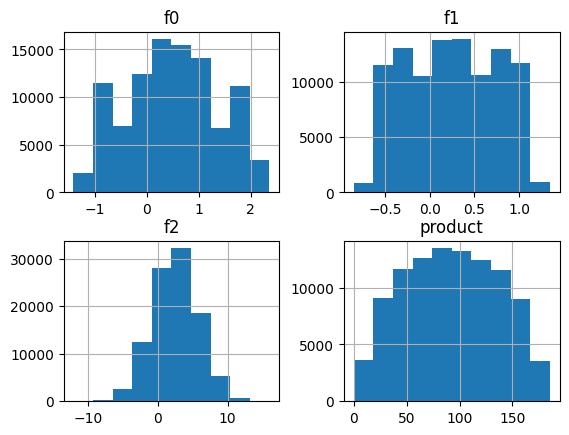

In [6]:
# Procemos a validar la distribucion de los datos a travez de un grafico.
region_0.hist()

In [7]:
region_0.sample(9)

,id,f0,f1,f2,product
24110,KmGbH,-0.681970,0.836569,6.844268,63.710834
13865,j8Kz1,-0.154881,0.316867,2.225437,112.938421
60544,nOEB9,1.125213,0.120156,-2.134023,35.961670
70458,mhwcp,0.077663,-0.020146,3.494393,156.739845
31748,gq1ED,2.072104,0.306156,5.082634,111.318072
40617,IJADJ,-0.790865,0.605501,-0.197828,57.796948
43705,j4FkN,-0.985623,0.603833,-2.012618,9.858281
93930,LC2It,-1.045169,0.108496,0.436107,26.186089
9004,liElQ,1.994243,0.504439,5.402529,162.701377


In [8]:
# Analizamos mi DF region_1
region_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [9]:
#Validamos si hay valores duplicados a nivel general.
#Validamos si hay valores duplicados a nivel de ID
print('Df region_1')
print(region_1.duplicated().sum())
print('Df region_1 a nivel de ID')
print(region_1['id'].duplicated().sum())

Df region_1
0
Df region_1 a nivel de ID
4


In [10]:
# Procedo a eliminar los 10 ID duplicados.
region_1 = region_1.drop_duplicates(subset='id')
# Volvemos a revisar los duplicados para veriicar que se hayan eliminado.
print(region_1['id'].duplicated().sum())

0


array([[<Axes: title={'center': 'f0'}>, <Axes: title={'center': 'f1'}>],
       [<Axes: title={'center': 'f2'}>,
        <Axes: title={'center': 'product'}>]], dtype=object)

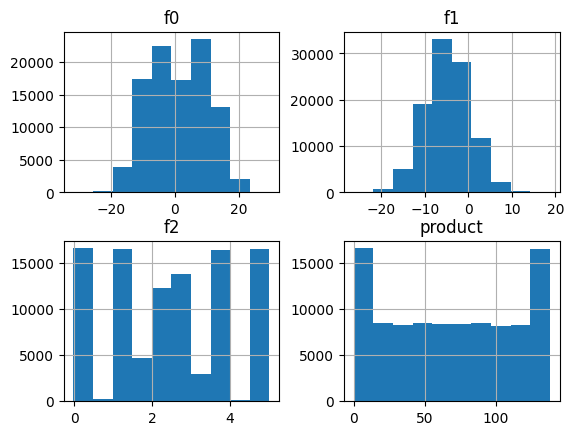

In [11]:
# Procemos a validar la distribucion de los datos a travez de un grafico.
region_1.hist()

In [12]:
region_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [13]:
#Validamos si hay valores duplicados a nivel general.
#Validamos si hay valores duplicados a nivel de ID
print('Df region_2')
print(region_2.duplicated().sum())
print('Df region_2 a nivel de ID')
print(region_2['id'].duplicated().sum())

Df region_2
0
Df region_2 a nivel de ID
4


In [14]:
# Procedo a eliminar los 10 ID duplicados.
region_2 = region_2.drop_duplicates(subset='id')
# Volvemos a revisar los duplicados para veriicar que se hayan eliminado.
print(region_2['id'].duplicated().sum())

0


array([[<Axes: title={'center': 'f0'}>, <Axes: title={'center': 'f1'}>],
       [<Axes: title={'center': 'f2'}>,
        <Axes: title={'center': 'product'}>]], dtype=object)

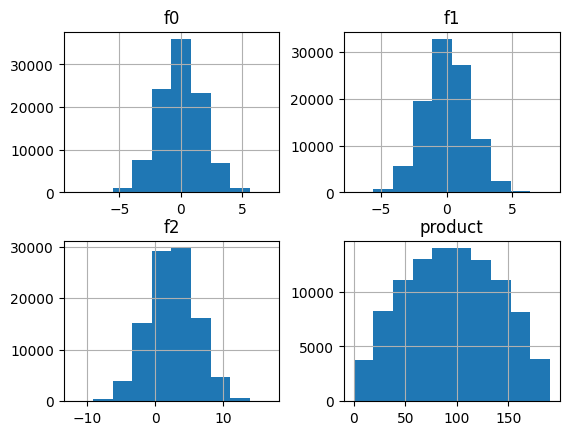

In [15]:
region_2.hist()

In [16]:
# Creamos una funcion.
def regresion_lineal_model(feature, target):
    #Dividimos conjunto de entrenamiento y validacion 75:25
    feature_train, feature_valid, target_train, target_valid = train_test_split(feature, target, random_state=123, test_size=0.25)
    
    # Aplicamos y ajustamos el modelo con los datos de entrenamiento
    modelo = LinearRegression()
    modelo.fit(feature_train, target_train)
    
    # Predecimos el modelo con los datos de validacion y pasamos a series para un mejor trabajo.
    modelo_predict = modelo.predict(feature_valid)
    predict = pd.Series(modelo_predict)
    
    # Volumen medio de reservas predicho.
    volumen_mean = predict.mean()
    
    #Volumen real de reservas.
    volumen_real = target_valid.mean()
    
    #RMSE del modelo.
    mse = mean_squared_error(target_valid, modelo_predict)
    RMSE = mse ** 0.5
    
    print('Volúmen medio verdadero de reservas en la región:', volumen_real),
    print('Volúmen medio de reservas predicho por el modelo:', volumen_mean),
    print('RMSE del modelo:', RMSE)

    return predict, volumen_mean, RMSE

In [17]:
# Calculando las ganancios de los 200 principales pozos de cada región

def pozos_y_gananciap(predict):
    #Calculando los 200 pozos
    pozos_200 = predict.nlargest(200)

    # Calculando la ganancia de los pozos seleccionados

    beneficio = (pozos_200.sum()) * 4500 - 100000000

    return beneficio

In [18]:
# Calculando el bootstraping.
def bootstraping(predict):
    state = RandomState(123)
    value = []
    
    for i in range(1000):
        subsample = predict.sample(n=500 , replace=True, random_state=state)
        ganancia_real = subsample.sum() * 4500 - 100000000
        value.append(ganancia_real)
        
    value = pd.Series(value)
    
    # Beneficio promedio
    beneficio_promedio = value.mean()

    # Intervalo de confianza del 95%
    lower = value.quantile(0.025)
    upper = value.quantile(0.975)

    #calcular el riesgo de pérdidas
    risk_percent = (predict < 0).sum() / 100

    return value, beneficio_promedio, lower, upper, risk_percent

In [ ]:
#Entrenando la  region 0
feature_0 = region_0.drop(columns=['id', 'product'])
target_0 = region_0['product']

predict_0, volumen_mean_0, RMSE_0 = regresion_lineal_model(feature_0, target_0)

Volúmen medio verdadero de reservas en la región: 92.3493121484093
Volúmen medio de reservas predicho por el modelo: 92.6806203637552
RMSE del modelo: 37.59580657262362


In [20]:
#Entrenando la primera region
feature_1 = region_1.drop(columns=['id', 'product'])
target_1 = region_1['product']

predict_1, volumen_mean_1, RMSE_1 = regresion_lineal_model(feature_1, target_1)

Volúmen medio verdadero de reservas en la región: 69.30484767860243
Volúmen medio de reservas predicho por el modelo: 69.31422919477677
RMSE del modelo: 0.8944711936820188


In [ ]:
#Entrenando la segunda region
feature_2 = region_2.drop(columns=['id', 'product'])
target_2 = region_2['product']

predict_2, volumen_mean_2, RMSE_2 = regresion_lineal_model(feature_2, target_2)

Volúmen medio verdadero de reservas en la región: 94.72734506975256
Volúmen medio de reservas predicho por el modelo: 94.93789877099006
RMSE del modelo: 40.04908749269798


In [23]:
data_resumen_1 = pd.DataFrame(dict(RSME =[RMSE_0, RMSE_1, RMSE_2]), index = [' Region_0', 'Region_1', 'Region_2'])
data_resumen_1

,RSME
Region_0,37.595807
Region_1,0.894471
Region_2,40.049087


En los tres casos, el modelo erró entre 0.89 y 40. Sin embargo, el modelo predijo con mas certeza la region 1 con RMSE de 0.89, en las demás regiones presenta errores muy alto, lo que significa que el modelo no esta tan cerca de los valores reales.

## Comparamos las reservas minimas de cada región

In [24]:
# Sacando lo minimo pozos necesario para no tener perdidas.
inversion = 100000000
ctn_pozos = 200
price_pozo = 4500
minimo = inversion / ctn_pozos / price_pozo
print(f'La cantidad de pozos minimos para no tener perdida es de:{minimo}')

La cantidad de pozos minimos para no tener perdida es de:111.11111111111111


In [25]:
# Comparamos el promedio real de pozos a nivel de regiones.
print('Media de unidades de reserva de pozo de region 0 es de:', region_0['product'].mean())
print('Media de unidades de reserva de pozo de region 1 es de:', region_1['product'].mean())
print('Media de unidades de reserva de pozo de region 2 es de:', region_2['product'].mean())

Media de unidades de reserva de pozo de region 0 es de: 92.49968421774354
Media de unidades de reserva de pozo de region 1 es de: 68.82391591804064
Media de unidades de reserva de pozo de region 2 es de: 94.99834211933378


En promedio, ninguna de las 3 regiones supera el minimo de pozos necesario para la inversion de USD 100000000, sin tener perdidas.

## Calculo de ganancia para los 200 principales pozos de cada region

In [26]:
# Calculo de ganancias de los principales pozos
beneficio0 = pozos_y_gananciap(predict_0)
beneficio1 = pozos_y_gananciap(predict_1)
beneficio2 = pozos_y_gananciap(predict_2)

print(f'Ganancia potencial de los 200 principales pozos de la region 0 es de: USD {beneficio0}')
print(f'Ganancia potencial de los 200 principales pozos de la region 1 es de: USD {beneficio1}')
print(f'Ganancia potencial de los 200 principales pozos de la region 2 es de: USD {beneficio2}')

Ganancia potencial de los 200 principales pozos de la region 0 es de: USD 39046563.01780316
Ganancia potencial de los 200 principales pozos de la region 1 es de: USD 24897284.84390293
Ganancia potencial de los 200 principales pozos de la region 2 es de: USD 34245305.88667789


De acuerdo al modelo entrenado la region 0 nos una ganancia aproximado de USD 39 millones en comparación a las demás regiones.

## Aplicando bootstraping, beneficio promedio y riesgo

In [27]:
#Calculando el beneficio promedio, intervalo de confianza y riesgo de perdidad en la region 0
values_0, beneficio_promedio_0, lower_0, upper_0, risk_percent_0 = bootstraping(predict_0)

print(f'EL beneficio promedio para la region 0 es de: USD {beneficio_promedio_0}')
print(f"El intervalo de confianza para las ganancias en la region '0' es entre {lower_0} y {upper_0} millones")
print(f"Riesgo de pérdidas en región '0': {risk_percent_0} %")

EL beneficio promedio para la region 0 es de: USD 108558010.85805756
El intervalo de confianza para las ganancias en la region '0' es entre 104036553.72684172 y 112781069.04960823 millones
Riesgo de pérdidas en región '0': 0.01 %


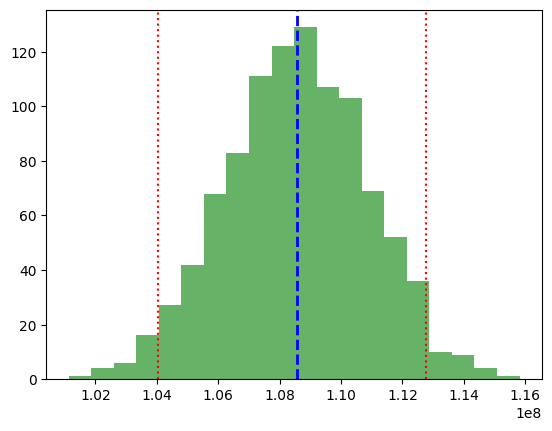

In [28]:
# Graficando el beneficio promedio y mi intervalo de confianza.
# Graficar el histograma de los datos
plt.hist(values_0, bins=20, alpha=0.6, color='g', label='Datos')
# Añadir línea para el beneficio promedio
plt.axvline(beneficio_promedio_0, color='b', linestyle='dashed', linewidth=2, label=f'Beneficio Promedio: {beneficio_promedio_0:.2f}')
# Dibujar el intervalo de confianza
plt.axvline(lower_0, color='r', linestyle='dotted', label=f'IC Inferior: {lower_0:.2f}')
plt.axvline(upper_0, color='r', linestyle='dotted', label=f'IC Superior: {upper_0:.2f}')

In [29]:
#Calculando el beneficio promedio, intervalo de confianza y riesgo de perdidad en la region 1
values_1, beneficio_promedio_1, lower_1, upper_1, risk_percent_1 = bootstraping(predict_1)

print(f'EL beneficio promedio para la region 1 es de: USD {beneficio_promedio_1}')
print(f"El intervalo de confianza para las ganancias en la region '0' es entre {lower_1} y {upper_1} millones")
print(f"Riesgo de pérdidas en región '0': {risk_percent_1} %")

EL beneficio promedio para la region 1 es de: USD 56191095.98431268
El intervalo de confianza para las ganancias en la region '0' es entre 47472947.23188413 y 65271300.80657752 millones
Riesgo de pérdidas en región '0': 5.27 %


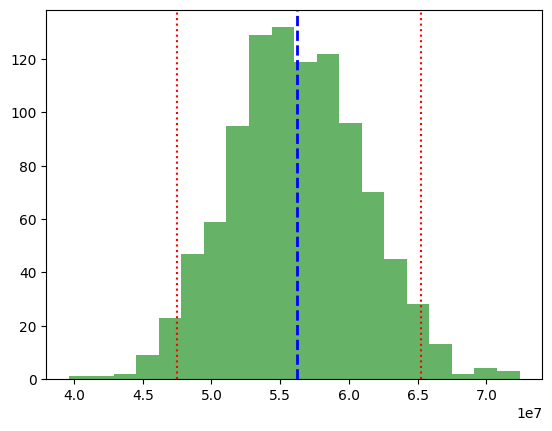

In [30]:
#Graficando el beneficio promedio y mi intervalo de confianza.
# Graficar el histograma de los datos
plt.hist(values_1, bins=20, alpha=0.6, color='g', label='Datos')
# Añadir línea para el beneficio promedio
plt.axvline(beneficio_promedio_1, color='b', linestyle='dashed', linewidth=2, label=f'Beneficio Promedio: {beneficio_promedio_1:.2f}')
# Dibujar el intervalo de confianza
plt.axvline(lower_1, color='r', linestyle='dotted', label=f'IC Inferior: {lower_1:.2f}')
plt.axvline(upper_1, color='r', linestyle='dotted', label=f'IC Superior: {upper_1:.2f}')

In [31]:
#Calculando el beneficio promedio, intervalo de confianza y riesgo de perdidad en la region 2
values_2, beneficio_promedio_2, lower_2, upper_2, risk_percent_2 = bootstraping(predict_2)

print(f'EL beneficio promedio para la region 1 es de: USD {beneficio_promedio_2}')
print(f"El intervalo de confianza para las ganancias en la region '0' es entre {lower_2} y {upper_2} millones")
print(f"Riesgo de pérdidas en región '0': {risk_percent_2} %")

EL beneficio promedio para la region 1 es de: USD 113587828.7928065
El intervalo de confianza para las ganancias en la region '0' es entre 109699908.02061674 y 117430601.13759786 millones
Riesgo de pérdidas en región '0': 0.0 %


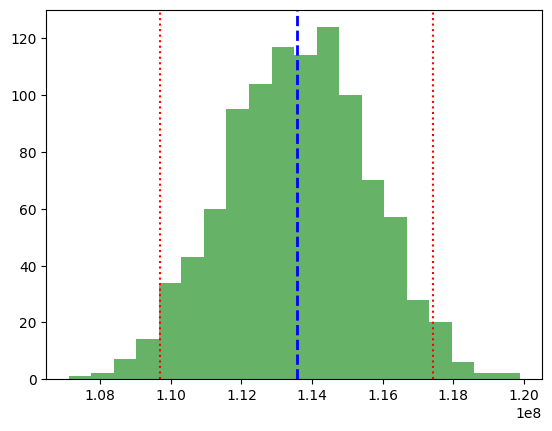

In [32]:
#Graficando el beneficio promedio y mi intervalo de confianza.
# Graficar el histograma de los datos
plt.hist(values_2, bins=20, alpha=0.6, color='g', label='Datos')
# Añadir línea para el beneficio promedio
plt.axvline(beneficio_promedio_2, color='b', linestyle='dashed', linewidth=2, label=f'Beneficio Promedio: {beneficio_promedio_1:.2f}')
# Dibujar el intervalo de confianza
plt.axvline(lower_2, color='r', linestyle='dotted', label=f'IC Inferior: {lower_2:.2f}')
plt.axvline(upper_2, color='r', linestyle='dotted', label=f'IC Superior: {upper_2:.2f}')